In [10]:
import math
import numpy as np

In [2]:
# Forward Euler Iterator 
def FE(a, b, c, d, x0, y0, T, deltaT):
    nextX = x0 + deltaT*(a*x0 - b*x0*y0)
    nextY = y0 + deltaT*(c*x0*y0 - d*y0)
    return nextX, nextY

In [ ]:
# Backward Euler Iterator 
# def BE(a, b, c, d, x0, y0, T, deltaT):


In [3]:
# Leap-frog Iterator
def leapFrog(a, b, c, d, x0, y0, T, deltaT):
    x1, y1 = FE(a, b, c, d, x0, y0, T, deltaT)
    nextX = x0 + 2*deltaT*(a*x1 - b*x1*y1)
    nextY = y0 + 2*deltaT*(c*x1*y1 - d*y1)
    return nextX, nextY


In [12]:
# Run all three to plot x vs y
def runIterators(a=1, b=0.25, c=0.1, d=1, x0=50, y0=1, T=100, deltaT=0.01):
    forward_eulerX = []
    forward_eulerY = []
    # leap_frog = dict()
    for i in range(T):
        xFE, yFE = FE(a, b, c, d, forward_eulerX[-1], forward_eulerY[-1], T[i], deltaT)
        forward_eulerX.append(xFE)
        forward_eulerY.append(yFE)
        # xLF, yLF = leapFrog(a, b, c, d, x0, y0, T[i], deltaT)
        # leap_frog[T[i]] = (xLF, yLF)
    return forward_eulerX, forward_eulerY
forward_eulerX, forward_eulerY= runIterators(a=1, b=0.25, c=0.1, d=1, x0=50, y0=1, T=100, deltaT=0.01)

IndexError: list index out of range

In [11]:
def runIterators(a=1, b=0.25, c=0.1, d=1, x0=50, y0=1, T=100, deltaT=0.01):
    num_steps = int(T / deltaT) + 1
    time_values = np.linspace(0, T, num_steps)

    forward_euler = dict()
    for t in time_values:
        if t == 0:
            xFE, yFE = x0, y0
        else:
            xFE, yFE = FE(a, b, c, d, forward_euler[t - deltaT][0], forward_euler[t - deltaT][1], deltaT, t)
        forward_euler[t] = (xFE, yFE)
        
    return forward_euler

results = runIterators(a=1, b=0.25, c=0.1, d=1, x0=50, y0=1, T=100, deltaT=0.01)


KeyError: 0.019999999999999997

/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_2859/3660989044.py:34: RuntimeWarning: overflow encountered in double_scalars
  x_dot = a * x_values[step - 1] - b * x_values[step - 1] * y_values[step - 1]
/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_2859/3660989044.py:35: RuntimeWarning: overflow encountered in double_scalars
  y_dot = c * x_values[step - 1] * y_values[step - 1] - d * y_values[step - 1]
/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_2859/3660989044.py:35: RuntimeWarning: invalid value encountered in double_scalars
  y_dot = c * x_values[step - 1] * y_values[step - 1] - d * y_values[step - 1]


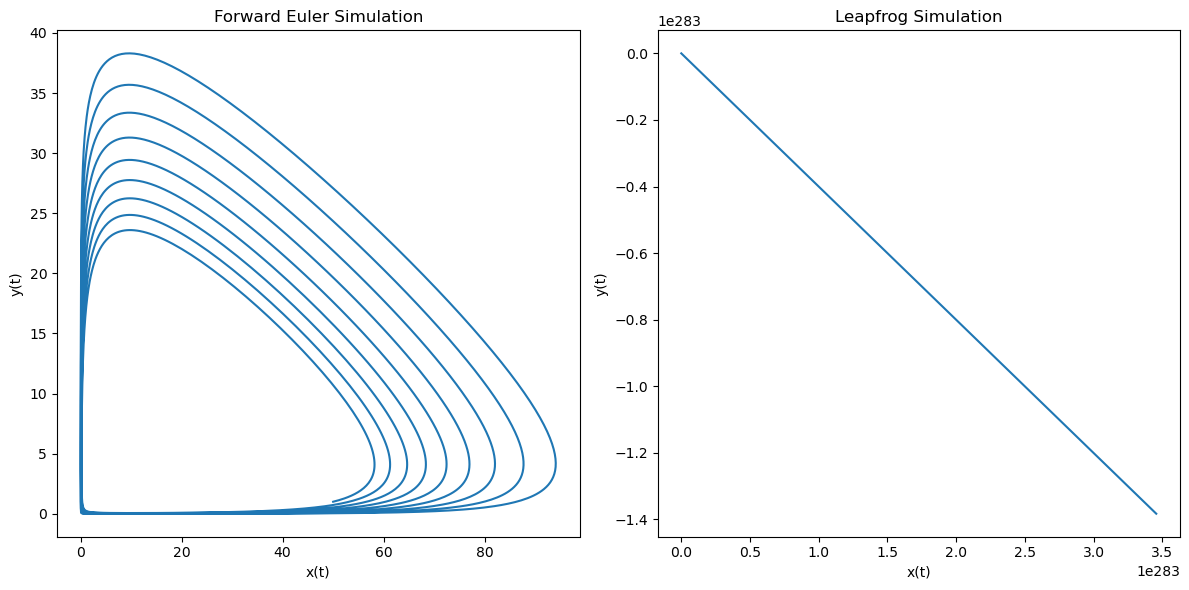

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Lotka-Volterra model equations
def forward_euler(a, b, c, d, x0, y0, dt, T):
    num_steps = int(T / dt) + 1
    x_values = np.zeros(num_steps)
    y_values = np.zeros(num_steps)
    x_values[0] = x0
    y_values[0] = y0
    
    for step in range(1, num_steps):
        x_dot = a * x_values[step - 1] - b * x_values[step - 1] * y_values[step - 1]
        y_dot = c * x_values[step - 1] * y_values[step - 1] - d * y_values[step - 1]
        x_values[step] = x_values[step - 1] + dt * x_dot
        y_values[step] = y_values[step - 1] + dt * y_dot
        
    return x_values, y_values

def leapfrog(a, b, c, d, x0, y0, dt, T):
    num_steps = int(T / dt) + 1
    x_values = np.zeros(num_steps)
    y_values = np.zeros(num_steps)
    x_values[0] = x0
    y_values[0] = y0

    # Use forward Euler for the first step
    x_dot = a * x0 - b * x0 * y0
    y_dot = c * x0 * y0 - d * y0
    x_values[1] = x0 + dt * x_dot
    y_values[1] = y0 + dt * y_dot
    
    for step in range(2, num_steps):
        x_dot = a * x_values[step - 1] - b * x_values[step - 1] * y_values[step - 1]
        y_dot = c * x_values[step - 1] * y_values[step - 1] - d * y_values[step - 1]
        x_values[step] = x_values[step - 2] + 2 * dt * x_dot
        y_values[step] = y_values[step - 2] + 2 * dt * y_dot
        
    return x_values, y_values

# Set the parameters and initial conditions
a = 1.0
b = 0.25
c = 0.1
d = 1.0
x0 = 50.0
y0 = 1.0
dt = 0.01
T = 100.0

# Simulate with forward Euler
x_fe, y_fe = forward_euler(a, b, c, d, x0, y0, dt, T)

# Simulate with leapfrog integrator
x_lf, y_lf = leapfrog(a, b, c, d, x0, y0, dt, T)

# Plot the results with x-values on the x-axis and y-values on the y-axis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_fe, y_fe)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Forward Euler Simulation')

plt.subplot(1, 2, 2)
plt.plot(x_lf, y_lf)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Leapfrog Simulation')

plt.tight_layout()
plt.show()


/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_2859/486101204.py:34: RuntimeWarning: overflow encountered in double_scalars
  x_dot = a * x_values[step - 1] - b * x_values[step - 1] * y_values[step - 1]
/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_2859/486101204.py:35: RuntimeWarning: overflow encountered in double_scalars
  y_dot = c * x_values[step - 1] * y_values[step - 1] - d * y_values[step - 1]
/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_2859/486101204.py:35: RuntimeWarning: invalid value encountered in double_scalars
  y_dot = c * x_values[step - 1] * y_values[step - 1] - d * y_values[step - 1]


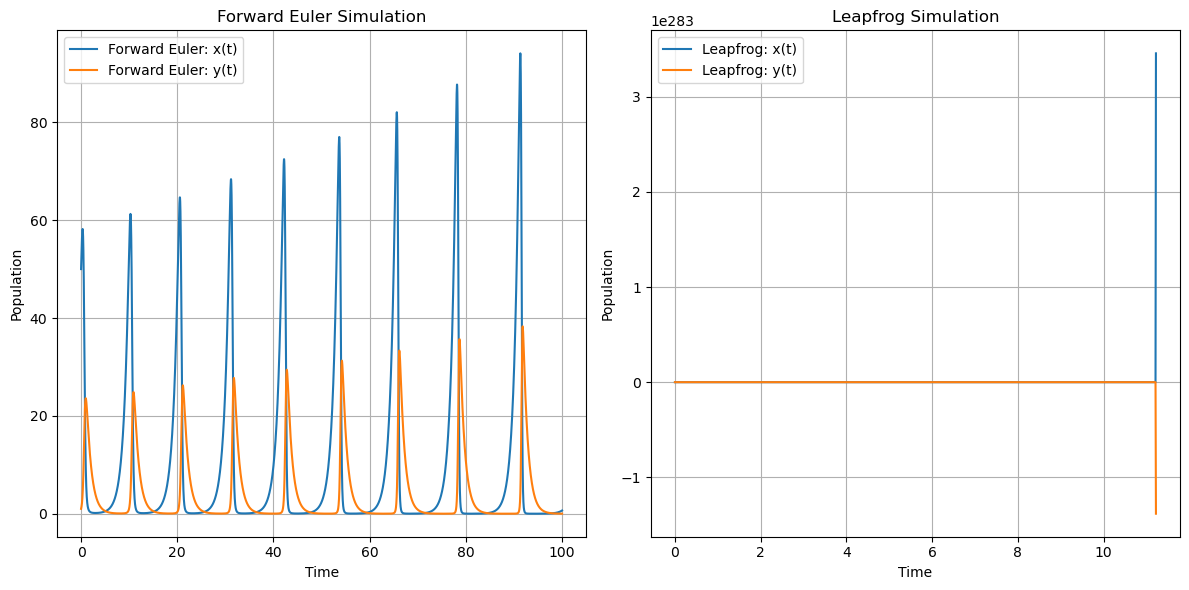

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Lotka-Volterra model equations
def forward_euler(a, b, c, d, x0, y0, dt, T):
    num_steps = int(T / dt) + 1
    x_values = np.zeros(num_steps)
    y_values = np.zeros(num_steps)
    x_values[0] = x0
    y_values[0] = y0
    
    for step in range(1, num_steps):
        x_dot = a * x_values[step - 1] - b * x_values[step - 1] * y_values[step - 1]
        y_dot = c * x_values[step - 1] * y_values[step - 1] - d * y_values[step - 1]
        x_values[step] = x_values[step - 1] + dt * x_dot
        y_values[step] = y_values[step - 1] + dt * y_dot
        
    return x_values, y_values

def leapfrog(a, b, c, d, x0, y0, dt, T):
    num_steps = int(T / dt) + 1
    x_values = np.zeros(num_steps)
    y_values = np.zeros(num_steps)
    x_values[0] = x0
    y_values[0] = y0

    # Use forward Euler for the first step
    x_dot = a * x0 - b * x0 * y0
    y_dot = c * x0 * y0 - d * y0
    x_values[1] = x0 + dt * x_dot
    y_values[1] = y0 + dt * y_dot
    
    for step in range(2, num_steps):
        x_dot = a * x_values[step - 1] - b * x_values[step - 1] * y_values[step - 1]
        y_dot = c * x_values[step - 1] * y_values[step - 1] - d * y_values[step - 1]
        x_values[step] = x_values[step - 2] + 2 * dt * x_dot
        y_values[step] = y_values[step - 2] + 2 * dt * y_dot
        
    return x_values, y_values

# Set the parameters and initial conditions
a = 1.0
b = 0.25
c = 0.1
d = 1.0
x0 = 50.0
y0 = 1.0
dt = 0.01
T = 100.0

# Simulate with forward Euler
x_fe, y_fe = forward_euler(a, b, c, d, x0, y0, dt, T)

# Simulate with leapfrog integrator
x_lf, y_lf = leapfrog(a, b, c, d, x0, y0, dt, T)

# Create time values
time_values = np.arange(0, T + dt, dt)

# Plot the results separately
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(time_values, x_fe, label='Forward Euler: x(t)')
plt.plot(time_values, y_fe, label='Forward Euler: y(t)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Forward Euler Simulation')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_values, x_lf, label='Leapfrog: x(t)')
plt.plot(time_values, y_lf, label='Leapfrog: y(t)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Leapfrog Simulation')
plt.grid(True)

plt.tight_layout()
plt.show()
